In [168]:
import numpy as np
import os
import matplotlib.pyplot as plt
import nibabel as nb
import SimpleITK as sitk


import HeadCT_motion_correction_PAR.functions_collection as ff
import HeadCT_motion_correction_PAR.Data_processing as dp
import HeadCT_motion_correction_PAR.motion_simulator.transformation as transform

main_path = '/mnt/mount_zc_NAS/head_phantom_raw/processed'

# Figure out the deformation between two scans

In [169]:
scan_4_3 = nb.load(os.path.join(main_path,'study_4/scan3/processed_0/recon/recon.nii.gz')).get_fdata()[:,:,40:100]

scan_4_4 = nb.load(os.path.join(main_path,'study_4/scan4/processed_0/recon/recon.nii.gz')).get_fdata()[:,:,40:100]

scan_4_5 = nb.load(os.path.join(main_path,'study_4/scan5/processed_0/recon/recon.nii.gz')).get_fdata()[:,:,40:100]

scan_4_6 = nb.load(os.path.join(main_path,'study_4/scan6/processed_0/recon/recon.nii.gz')).get_fdata()[:,:,40:100]

scan_5_1 = nb.load(os.path.join(main_path,'study_5/scan1/processed_0/recon/recon.nii.gz')).get_fdata()[:,:,40:100]

spacing = [0.6, 0.6, 2.8]

In [185]:
a = np.copy(scan_4_5)
b = np.copy(scan_4_6)

mae_list = []
for t in np.arange(-2,3,1):
    for r in np.arange(-2,3,1):
        translation,rotation,scale,transformation_matrix = transform.generate_transform_matrix([t,0,0], [0,0,r / 180 * np.pi], [1,1,1],a.shape)

        transformation_matrix = transform.transform_full_matrix_offset_center(transformation_matrix, a.shape)

        img_t = transform.apply_affine_transform(a, transformation_matrix, order = 3, cval = np.min(a))
        
        mae = np.mean(np.abs(img_t - b))

        print(t, r , mae)

        mae_list.append(mae)



-2 -2 42.375502077658616
-2 -1 25.429976301024343
-2 0 10.58115005493164
-2 1 27.97695624525793
-2 2 44.183984607658196
-1 -2 38.70545502314643
-1 -1 21.551559561282474
-1 0 13.953681627909344
-1 1 31.80034432267988
-1 2 47.31944599629597
0 -2 38.073638566796944
0 -1 23.550468624507012
0 0 21.708550516764326
0 1 38.548299904189776
0 2 52.586813892853804
1 -2 40.35889721972256
1 -1 29.04167539555324
1 0 31.386479504903164
1 1 46.57096977714262
1 2 59.22463394715486
2 -2 44.82859730129492
2 -1 35.79173929226397
2 0 41.056768163045255
2 1 54.85472247982258
2 2 66.26088819521495


20.71440684000651


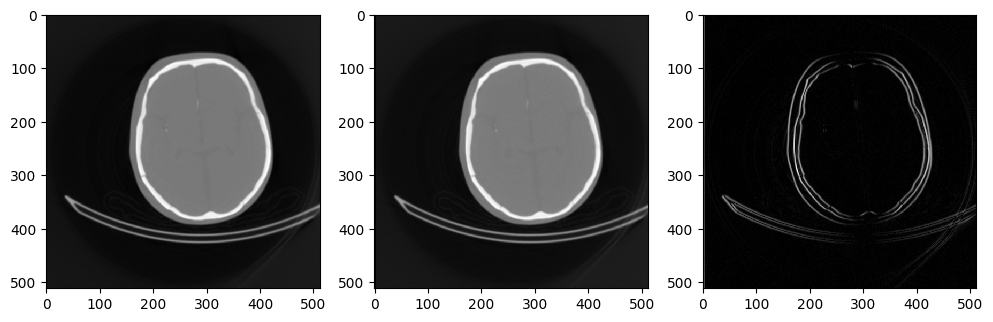

In [179]:
# define translation
t = [-1,0,0]
# define rotation
r = [0,0,0]
r = [rr/180 * np.pi for rr in r]
# define scaling
s = [1,1,1]


translation,rotation,scale,transformation_matrix = transform.generate_transform_matrix(t,r,s,scan_4_3.shape)

transformation_matrix = transform.transform_full_matrix_offset_center(transformation_matrix, scan_4_3.shape)

img_t = transform.apply_affine_transform(scan_4_3, transformation_matrix, order = 3, cval = np.min(scan_4_3))

print(np.mean(np.abs(img_t - scan_4_4)))


plt.figure(figsize = (12,4))
plt.subplot(131); plt.imshow(scan_4_3[:,:, img_t.shape[-1]//2].T, 'gray')
plt.subplot(132); plt.imshow(img_t[:,:, img_t.shape[-1]//2].T, 'gray')
plt.subplot(133); plt.imshow(np.abs(scan_4_4[:,:, img_t.shape[-1]//2].T - img_t[:,:, img_t.shape[-1]//2].T), 'gray')


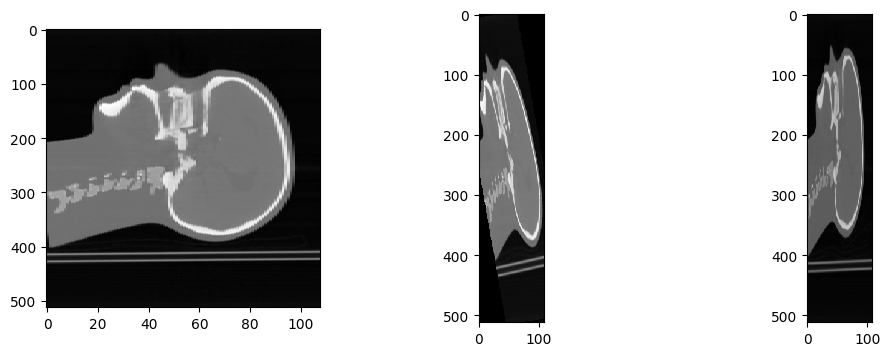

In [182]:
scan_4_6_a = nb.load(os.path.join(main_path,'study_4/scan6/processed_0/recon/recon.nii.gz')).get_fdata()

scan_5_1_a = nb.load(os.path.join(main_path,'study_5/scan1/processed_0/recon/recon.nii.gz')).get_fdata()

# define translation
t = [0,0,0]
# define rotation
r = [-10,0,0]
r = [rr/180 * np.pi for rr in r]
# define scaling
s = [1,1,1]


translation,rotation,scale,transformation_matrix = transform.generate_transform_matrix(t,r,s,scan_4_6_a.shape)

transformation_matrix = transform.transform_full_matrix_offset_center(transformation_matrix, scan_4_6_a.shape)

img_t = transform.apply_affine_transform(scan_4_6_a, transformation_matrix, order = 3, cval = np.min(scan_4_3))

# print(np.mean(np.abs(img_t - scan_4_4)))


plt.figure(figsize = (12,4))
plt.subplot(131); plt.imshow(scan_4_6_a[img_t.shape[0]//2, :,:], 'gray', aspect = spacing[0] / spacing[2])
plt.subplot(132); plt.imshow(img_t[img_t.shape[0]//2, :,:], 'gray')
plt.subplot(133); plt.imshow(scan_5_1_a[img_t.shape[0]//2, :,:], 'gray')
